# Assess the HYDROGFD runoffs dataset over the Arctic basin

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
! date

Wed Apr 19 08:40:01 GMT 2023


>> # Read CREG025.L75 grid

In [14]:
#ds_grd=xr.open_dataset('./CREG025.L75-NEMO420_tmask.nc')
ds_dfg=xr.open_dataset('./CREG025.L75_domain_cfg.nc')

In [15]:
ds_dfg

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    jpiglo        int32 ...
    jpjglo        int32 ...
    jpkglo        int32 ...
    jperio        int32 ...
    ln_zco        int32 ...
    ln_zps        int32 ...
    ln_sco        int32 ...
    ln_isfcav     int32 ...
    glamt         (t, y, x) float64 ...
    glamu         (t, y, x) float64 ...
    glamv         (t, y, x) float64 ...
    glamf         (t, y, x) float64 ...
    gphit         (t, y, x) float64 ...
    gphiu         (t, y, x) float64 ...
    gphiv         (t, y, x) float64 ...
    gphif         (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) fl

In [19]:
# Define a land-sea mask in an other way
tmask2D=xr.where(ds_dfg['bottom_level']>0,1.,0.)

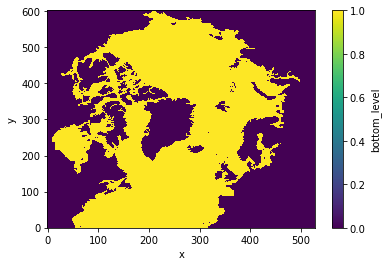

In [9]:
tmask2D.plot()

>> # Define the right area to extract from ANHA4 to fit CREG025.L75

# Read HYDROGFD runoffs data
- Read just 1 year to perform test of extraction

In [26]:
DATAIN='/home/datawork-lops-drakkarcom/DATA-REFERENCE/HYDROGFD-HYPE-FORCING/ANHA4/'
ds_isbarnf=xr.open_mfdataset(DATAIN+'ANHA4_ReNat_HydroGFD_HBC_runoff_monthly_y1981.nc',decode_times=False) #,concat_dim='time_counter')
ds_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 544, y: 800)
Coordinates:
  * time_counter  (time_counter) float64 1.206e+04 1.209e+04 ... 1.239e+04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(800, 544), chunksize=(800, 544)>
    nav_lat       (y, x) float32 dask.array<shape=(800, 544), chunksize=(800, 544)>
    socoefr       (y, x) float32 dask.array<shape=(800, 544), chunksize=(800, 544)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 800, 544), chunksize=(12, 800, 544)>
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (10-...

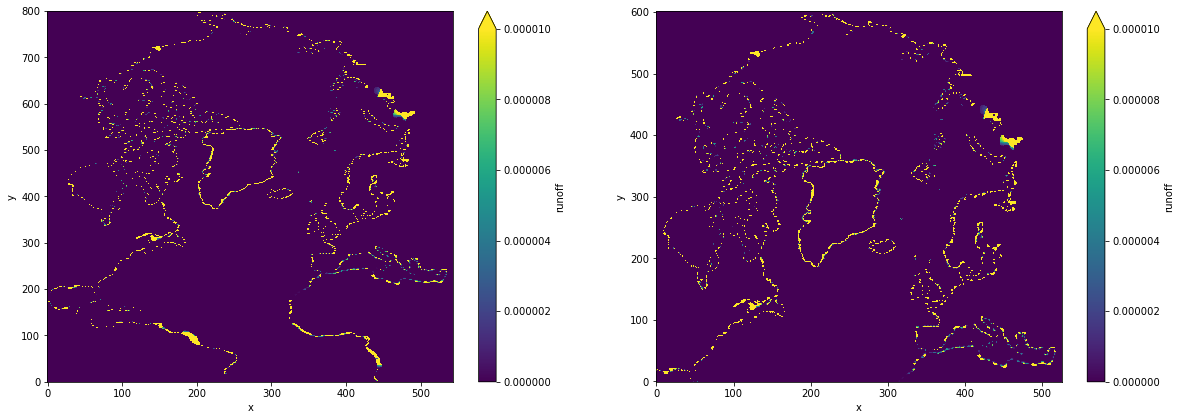

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(221)
ds_isbarnf['runoff'].mean('time_counter').plot(vmax=0.00001)

plt.subplot(222)
ds_isbarnf['runoff'].mean('time_counter').isel(x=slice(18,544),y=slice(187,789)).plot(vmax=0.00001)

In [28]:
subdom_isbarnf=ds_isbarnf.isel(x=slice(18,546),y=slice(187,790))

In [29]:
subdom_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 526, y: 603)
Coordinates:
  * time_counter  (time_counter) float64 1.206e+04 1.209e+04 ... 1.239e+04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    nav_lat       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    socoefr       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 603, 526), chunksize=(12, 603, 526)>
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (10-...

In [30]:
subdom_isbarnf['socoefr_msk']=(('y','x'),subdom_isbarnf['socoefr']+tmask2D[0,:,0:526])
subdom_isbarnf

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 526, y: 603)
Coordinates:
  * time_counter  (time_counter) float64 1.206e+04 1.209e+04 ... 1.239e+04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    nav_lat       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    socoefr       (y, x) float32 dask.array<shape=(603, 526), chunksize=(603, 526)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 603, 526), chunksize=(12, 603, 526)>
    socoefr_msk   (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (10-...

>> # Read Dai & Trenberth & Bamber runoffs data

In [20]:
DATAIN='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/DATA_FORCING/RUNOFFS/IA/'
ds_DTBrnf=xr.open_mfdataset(DATAIN+'CREG025_runoff_monthly_combined_Dai_Trenberth_Bamber_y*.nc')

In [21]:
ds_DTBrnf

<xarray.Dataset>
Dimensions:       (time_counter: 744, x: 528, y: 603)
Coordinates:
  * time_counter  (time_counter) object 1958-01-15 00:00:00 ... 2007-12-16 00:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(744, 603, 528), chunksize=(12, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(744, 603, 528), chunksize=(12, 603, 528)>
    socoefr       (time_counter, y, x) float32 dask.array<shape=(744, 603, 528), chunksize=(12, 603, 528)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(744, 603, 528), chunksize=(12, 603, 528)>
Attributes:
    source:   combined Dai & Trenberth and Bamber (totalFWtoRunoffRatio=0.46)...

In [23]:
subdom_DTB=ds_DTBrnf.isel(time_counter=slice(0,12))
subdom_DTB

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 528, y: 603)
Coordinates:
  * time_counter  (time_counter) object 1958-01-15 00:00:00 ... 1958-12-16 00:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    socoefr       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
Attributes:
    source:   combined Dai & Trenberth and Bamber (totalFWtoRunoffRatio=0.46)...

In [24]:
subdom_DTB['socoefr_msk']=(('y','x'),subdom_DTB['socoefr'].isel(time_counter=0)+tmask2D[0,:,:])
subdom_DTB

<xarray.Dataset>
Dimensions:       (time_counter: 12, x: 528, y: 603)
Coordinates:
  * time_counter  (time_counter) object 1958-01-15 00:00:00 ... 1958-12-16 00:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    socoefr       (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    runoff        (time_counter, y, x) float32 dask.array<shape=(12, 603, 528), chunksize=(12, 603, 528)>
    socoefr_msk   (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    source:   combined Dai & Trenberth and Bamber (totalFWtoRunoffRatio=0.46)...

# Significance of the subdom socoefr_msk variable
- 0 means land 
- 0.5 means river discharge over land == not good  
- 1 means ocean 
- 1.5 means river discharge into the ocean == we're happy with that

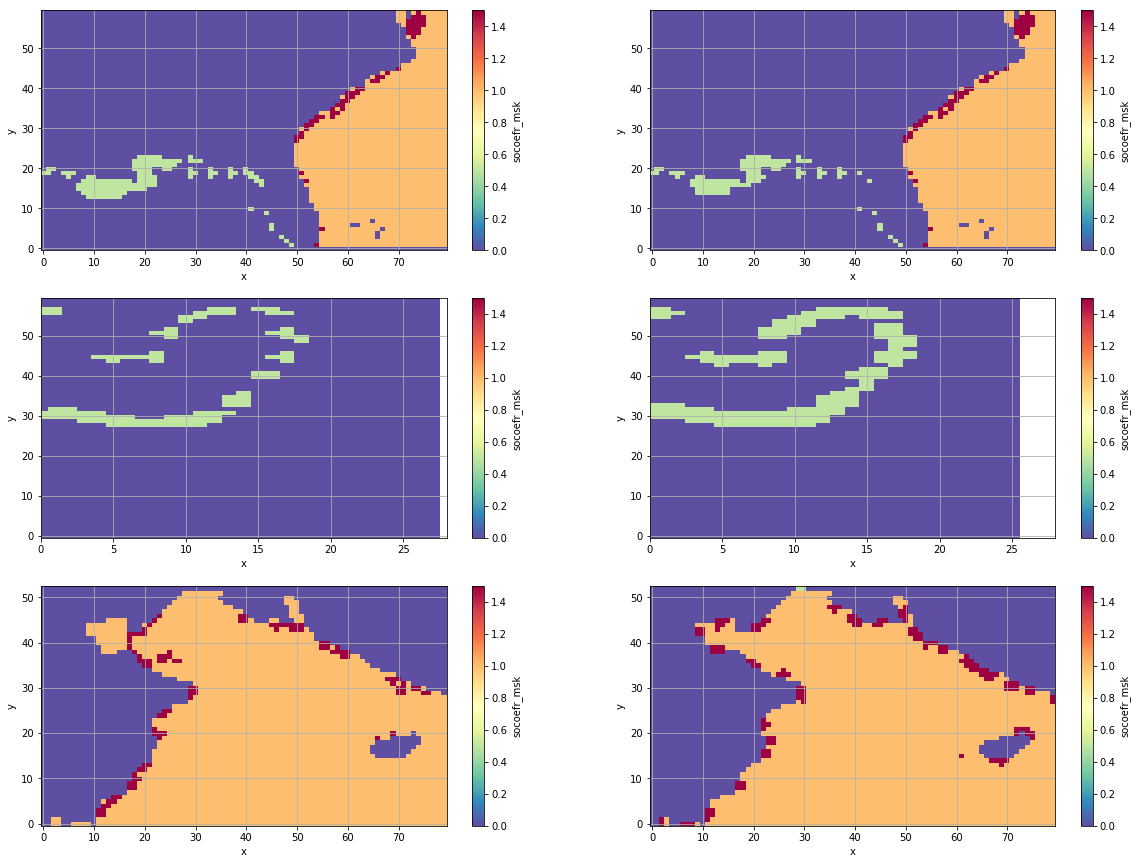

In [58]:
plt.figure(figsize=(20,15))

# Area over south-western side of the domain
plt.subplot(321)
plt.title('Extracted from CREG025')
subdom_DTB['socoefr_msk'].isel(x=slice(0,80),y=slice(0,60)).plot(cmap='Spectral_r')
plt.grid(True)

plt.subplot(322)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(0,80),y=slice(0,60)).plot(cmap='Spectral_r')
plt.grid(True)

# Area over south-eastern side of the domain
plt.subplot(323)
plt.title('Extracted from CREG025')
subdom_DTB['socoefr_msk'].isel(x=slice(500,528),y=slice(0,60)).plot(cmap='Spectral_r',vmax=1.5)
plt.xlim([0,28])
plt.grid(True)

plt.subplot(324)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(500,528),y=slice(0,60)).plot(cmap='Spectral_r',vmax=1.5)
plt.xlim([0,28])
plt.grid(True)

# Area over the Bering strait
plt.subplot(325)
plt.title('Extracted from CREG025')
subdom_DTB['socoefr_msk'].isel(x=slice(180,260),y=slice(550,603)).plot(cmap='Spectral_r')
plt.grid(True)

plt.subplot(326)
plt.title('Extracted from HydroGFD')
subdom_isbarnf['socoefr_msk'].isel(x=slice(180,260),y=slice(550,603)).plot(cmap='Spectral_r')
plt.grid(True)


# Attempt to explore interactively the socoefr_msk variable over the whole extracted domain to check that the ANHA4 coastline fit the CREG025 one 

In [59]:
import hvplot.xarray

In [60]:
Bering=subdom_isbarnf['socoefr_msk'].isel(x=slice(180,260),y=slice(550,603))
Bering.shape

(53, 80)

In [61]:
Bering.hvplot()

:NdOverlay   [Element]
   :Histogram   [socoefr_msk]   (socoefr_msk_count)

# Extract the HYROGFD data to fit the CREG025.L75 domain grid

In [17]:
# Save the corrected velocity field
# Ref experiment data
DATAOUT='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
DATAINI='/home/datawork-lops-drakkarcom/DATA-REFERENCE/HYDROGFD-HYPE-FORCING/ANHA4/'

donetcdf=False
if donetcdf: 

    for year in set(np.arange(1981,2021)):
        print('          >>>>>>>  year:',year)
        
        fileout='CREG025_ReNat_HydroGFD_HBC_runoff_monthly_y'+str(year)+'.nc'
        ds_Glo=xr.open_dataset(DATAINI+'ANHA4_ReNat_HydroGFD_HBC_runoff_monthly_y'+str(year)+'.nc',decode_times=False)

        extend_rnf=np.zeros((12,603,528))
        extend_coe=np.zeros((603,528))        

        extend_rnf[:,:,0:526]=ds_Glo['runoff'].isel(x=slice(18,546),y=slice(187,790))
        extend_coe[:,0:526]=ds_Glo['socoefr'].isel(x=slice(18,546),y=slice(187,790))
        
        ds_out=xr.Dataset()  
        ds_out['sorunoff']= (('time_counter','y','x'),extend_rnf)
        ds_out['sorunoff'].attrs['units']=ds_Glo['runoff'].attrs['units']
        
        ds_out['socoefr']=(('y','x'),extend_coe)

        ds_out.coords['nav_lat']=(('y','x'),ds_dfg['nav_lat'])
        ds_out.coords['nav_lon']=(('y','x'),ds_dfg['nav_lon'])
        ds_out.coords['time_counter']=(('time_counter'),\
                                       pd.date_range(start=str(year)+'-01',end=str(year)+'-12',\
                                       freq='MS')+pd.DateOffset(days=14))

        ds_out.attrs=ds_Glo.attrs
        
        ds_out.to_netcdf(DATAOUT+fileout, unlimited_dims={'time_counter':True})

          >>>>>>>  year: 1981
          >>>>>>>  year: 1982
          >>>>>>>  year: 1983
          >>>>>>>  year: 1984
          >>>>>>>  year: 1985
          >>>>>>>  year: 1986
          >>>>>>>  year: 1987
          >>>>>>>  year: 1988
          >>>>>>>  year: 1989
          >>>>>>>  year: 1990
          >>>>>>>  year: 1991
          >>>>>>>  year: 1992
          >>>>>>>  year: 1993
          >>>>>>>  year: 1994
          >>>>>>>  year: 1995
          >>>>>>>  year: 1996
          >>>>>>>  year: 1997
          >>>>>>>  year: 1998
          >>>>>>>  year: 1999
          >>>>>>>  year: 2000
          >>>>>>>  year: 2001
          >>>>>>>  year: 2002
          >>>>>>>  year: 2003
          >>>>>>>  year: 2004
          >>>>>>>  year: 2005
          >>>>>>>  year: 2006
          >>>>>>>  year: 2007
          >>>>>>>  year: 2008
          >>>>>>>  year: 2009
          >>>>>>>  year: 2010
          >>>>>>>  year: 2011
          >>>>>>>  year: 2012
          >>>>>>>  year: 2013
          

# Define a proper Arctic box following Haine et al. GPC2015

In [34]:
# Define a proper Arctic box following Haine et al. GPC2015
# including all Arctic area + CAA + north to Davis, FRAM and Bering straits as east to BSO
tmskBFGBIG=xr.where(ds_dfg['gphit'] < 62.,0., tmask2D)
# Remove the Baffin bay area
tmskBFGBIG=xr.where((ds_dfg['glamt'] >= -90.) & (ds_dfg['glamt'] < -45.) & (ds_dfg['gphit'][:,:] <= 80.), 0., tmskBFGBIG )
# Adjust the Baffin bay area north to Davis Strait 66.25N
tmskBFGBIG=xr.where((ds_dfg['glamt'] >= -70.) & (ds_dfg['glamt'] < -45.) & (ds_dfg['gphit'] >= 62.) & (ds_dfg['gphit'] < 66.25), 0., tmskBFGBIG) 
tmskBFGBIG=xr.where((ds_dfg['glamt'] >= -70.) & (ds_dfg['glamt'] < -65.) & (ds_dfg['gphit'] >= 66.25) & (ds_dfg['gphit'] < 67.) , 0., tmskBFGBIG)
# Remove all GIN seas area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < 17.) & (ds_dfg['glamt'] > -45.) & (ds_dfg['gphit'] < 79.), 0., tmskBFGBIG)
# Remove Hudson area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -70.) & (ds_dfg['glamt'] > -82. ) & (ds_dfg['gphit'] < 70.5), 0., tmskBFGBIG)
tmskBFGBIG=xr.where((ds_dfg['glamt'] <= -82.) & (ds_dfg['glamt'] > -100.) & (ds_dfg['gphit'] < 67.), 0., tmskBFGBIG)
# Adriatic area 
tmskBFGBIG=xr.where((ds_dfg['glamt'] < 30.) & (ds_dfg['glamt'] > 17.) & (ds_dfg['gphit'] < 68.), 0., tmskBFGBIG)


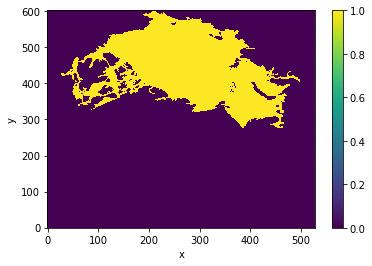

In [35]:
tmskBFGBIG.plot()

In [36]:
# Remove also the ACC area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -60.) & (ds_dfg['glamt'] > -120. ) & (ds_dfg['gphit'] < 80), 0., tmskBFGBIG)

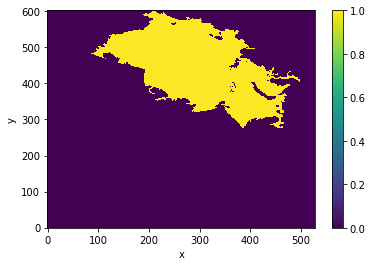

In [37]:
tmskBFGBIG.plot()

In [38]:
# Remove also the ACC area
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -120.) & (ds_dfg['glamt'] > -125. ) & (ds_dfg['gphit'] < 75), 0., tmskBFGBIG)
tmskBFGBIG=xr.where((ds_dfg['glamt'] < -60.) & (ds_dfg['glamt'] > -90. ) & (ds_dfg['gphit'] < 83), 0., tmskBFGBIG)

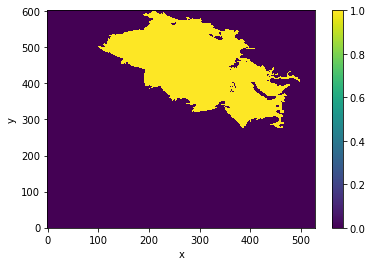

In [39]:
tmskBFGBIG.plot()

# Compute the sum over the CREG domain

### > HYDROGFD over the CREG domain data set

In [40]:
DATAINI='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/DATA_FORCING/RUNOFFS/HYDROGFD/'
ds_rnfhpe=xr.open_mfdataset(DATAINI+'CREG025_ReNat_HydroGFD_HBC_runoff_monthly_y*.nc')

In [41]:
ds_rnfhpe

<xarray.Dataset>
Dimensions:       (time_counter: 480, x: 528, y: 603)
Coordinates:
    nav_lat       (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    nav_lon       (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
  * time_counter  (time_counter) datetime64[ns] 1981-01-15 ... 2020-12-15
Dimensions without coordinates: x, y
Data variables:
    sorunoff      (time_counter, y, x) float64 dask.array<shape=(480, 603, 528), chunksize=(12, 603, 528)>
    socoefr       (time_counter, y, x) float64 dask.array<shape=(480, 603, 528), chunksize=(12, 603, 528)>
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (10-...

In [42]:
# To convert kg.s-1 to km3/year
alpha=1e-3*1e-9*365*86400.

In [44]:
ds_rnf_mon=xr.Dataset()
ds_rnf_mon['sorunoff_sum']=(('time_counter'),((ds_rnfhpe['sorunoff'][:,:,:]*tmskBFGBIG[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))
ds_rnf_mon['sorunoff_sum'].attrs={'units':'Sv'}
ds_rnf_mon.coords['time_counter']=(('time_counter'),ds_rnfhpe['time_counter'])


In [45]:
ds_rnf_mon

<xarray.Dataset>
Dimensions:       (time_counter: 480)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1981-01-15 ... 2020-12-15
Data variables:
    sorunoff_sum  (time_counter) float64 1.151e+03 944.8 ... 3.746e+03 2.347e+03

In [46]:
ds_rnf_year=xr.Dataset()
isba_syear=1981 ; isba_eyear=2020

ds_rnf_year['sorunoff_sum']=(('time_counter'),ds_rnf_mon['sorunoff_sum'].resample(time_counter="1Y").mean())
ds_rnf_year['sorunoff_sum'].attrs={'units':'Sv'}
ds_rnf_year.coords['time_counter']=pd.date_range(start=str(isba_syear),end=str(isba_eyear+1),freq="1Y")+pd.DateOffset(days=-183)


In [47]:
# Colmpute the mean & Std
syear_S1=1981  ;  eyear_S1=2000 
ds_rnf_year['sorunoff_Mean_S1']=ds_rnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).mean()
ds_rnf_year['sorunoff_Std_S1']=ds_rnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).std()
ds_rnf_year['sorunoff_Mean_S1'].attrs={'units':'km3.year-1','long name':'Mean over 1981-2000'}
ds_rnf_year['sorunoff_Std_S1'].attrs={'units':'km3.year-1','long name':'Std dev over 1981-2000'}
    
syear_S2=2000  ; eyear_S2=2010
ds_rnf_year['sorunoff_Mean_S2']=ds_rnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).mean()
ds_rnf_year['sorunoff_Std_S2']=ds_rnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).std()
ds_rnf_year['sorunoff_Mean_S2'].attrs={'units':'km3.year-1','long name':'Mean over 2000-2010'}
ds_rnf_year['sorunoff_Std_S2'].attrs={'units':'km3.year-1','long name':'Std dev over 2000-2010'}

In [48]:
ds_rnf_year

<xarray.Dataset>
Dimensions:           (time_counter: 40)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 1981-07-01 ... 2020-07-01
Data variables:
    sorunoff_sum      (time_counter) float64 4.85e+03 4.59e+03 ... 4.568e+03
    sorunoff_Mean_S1  float64 3.603e+03
    sorunoff_Std_S1   float64 411.3
    sorunoff_Mean_S2  float64 4.268e+03
    sorunoff_Std_S2   float64 288.5

In [63]:
if False:
    ds_rnf_mon.to_netcdf('./DATA/HYDROGFD_ARC_TiSe_1m_y'+str(isba_syear)+str(isba_eyear)+'.nc')
    ds_rnf_year.to_netcdf('./DATA/HYDROGFD_ARC_TiSe_1y_y'+str(isba_syear)+str(isba_eyear)+'.nc')

### > Dai & Trenberth & Bamber data set

In [49]:
ds_DTBrnf_mon=xr.Dataset()
dtb_syear=1958 ; dtb_eyear=2019

ds_DTBrnf_mon['sorunoff_sum']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmskBFGBIG[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))
ds_DTBrnf_mon.coords['time_counter']=pd.date_range(start=str(dtb_syear)+'-01',end=str(dtb_eyear)+'-12',freq='MS')+\
                                     pd.DateOffset(days=14)
ds_DTBrnf_mon['sorunoff_sum'].attrs={'units':'Sv'}

In [50]:
ds_DTBrnf_year=xr.Dataset()
ds_DTBrnf_year['sorunoff_sum']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum'].resample(time_counter="1Y").mean())
ds_DTBrnf_year.coords['time_counter']=pd.date_range(start=str(dtb_syear),end=str(dtb_eyear+1),freq="1Y")+pd.DateOffset(days=-183)
ds_DTBrnf_year['sorunoff_sum'].attrs={'units':'Sv'}

In [51]:
ds_DTBrnf_year

<xarray.Dataset>
Dimensions:       (time_counter: 62)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1958-07-01 ... 2019-07-01
Data variables:
    sorunoff_sum  (time_counter) float64 3.671e+03 3.667e+03 ... 3.67e+03

In [52]:
# Colmpute the mean & Std
syear_S1=1981  ;  eyear_S1=2000 
ds_DTBrnf_year['sorunoff_Mean_S1']=ds_DTBrnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).mean()
ds_DTBrnf_year['sorunoff_Std_S1']=ds_DTBrnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S1),str(eyear_S1))).std()
ds_DTBrnf_year['sorunoff_Mean_S1'].attrs={'units':'km3.year-1','long name':'Mean over 1981-2000'}
ds_DTBrnf_year['sorunoff_Std_S1'].attrs={'units':'km3.year-1','long name':'Std dev over 1981-2000'}
    
syear_S2=2000  ; eyear_S2=2010
ds_DTBrnf_year['sorunoff_Mean_S2']=ds_DTBrnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).mean()
ds_DTBrnf_year['sorunoff_Std_S2']=ds_DTBrnf_year['sorunoff_sum'].sel(time_counter=slice(str(syear_S2),str(eyear_S2))).std()
ds_DTBrnf_year['sorunoff_Mean_S2'].attrs={'units':'km3.year-1','long name':'Mean over 2000-2010'}
ds_DTBrnf_year['sorunoff_Std_S2'].attrs={'units':'km3.year-1','long name':'Std dev over 2000-2010'}

In [53]:
ds_DTBrnf_year

<xarray.Dataset>
Dimensions:           (time_counter: 62)
Coordinates:
  * time_counter      (time_counter) datetime64[ns] 1958-07-01 ... 2019-07-01
Data variables:
    sorunoff_sum      (time_counter) float64 3.671e+03 3.667e+03 ... 3.67e+03
    sorunoff_Mean_S1  float64 3.596e+03
    sorunoff_Std_S1   float64 147.4
    sorunoff_Mean_S2  float64 3.693e+03
    sorunoff_Std_S2   float64 102.4

In [72]:
if False:
    ds_DTBrnf_mon.to_netcdf('./DATA/Dai_ARC_TiSe_1m_y'+str(dtb_syear)+str(dtb_eyear)+'.nc')
    ds_DTBrnf_year.to_netcdf('./DATA/Dai_ARC_TiSe_1y_y'+str(dtb_syear)+str(dtb_eyear)+'.nc')

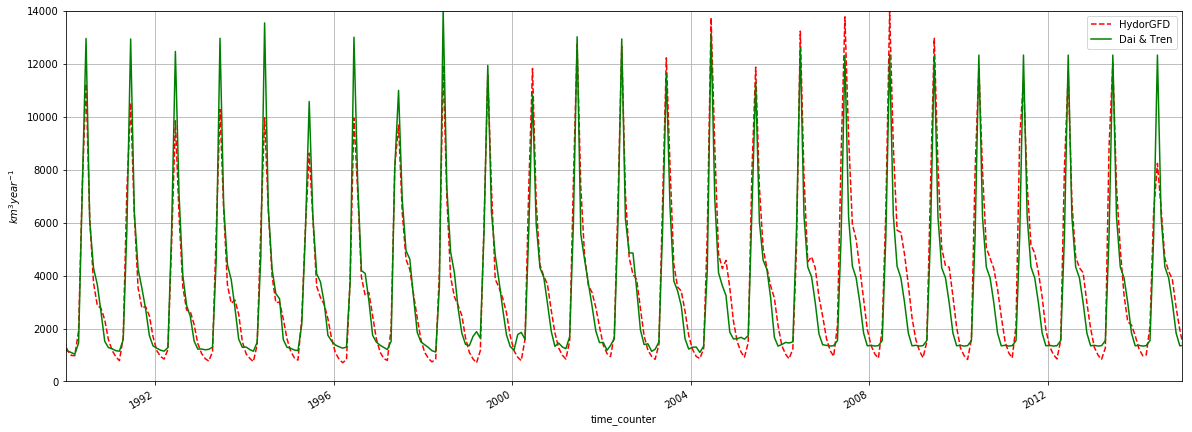

In [54]:
if False: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    plt.title('HydorGFD monthly runoffs ')
    (ds_rnf_mon['sorunoff_sum']).plot(color='r',linestyle='dashed',label='HydorGFD')
    (ds_DTBrnf_mon['sorunoff_sum']).plot(color='g',label='Dai & Tren')
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([0., 14000.])
    plt.grid()
    plt.legend()

    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_Arctic_DailyMonthly_y19902015.pdf')



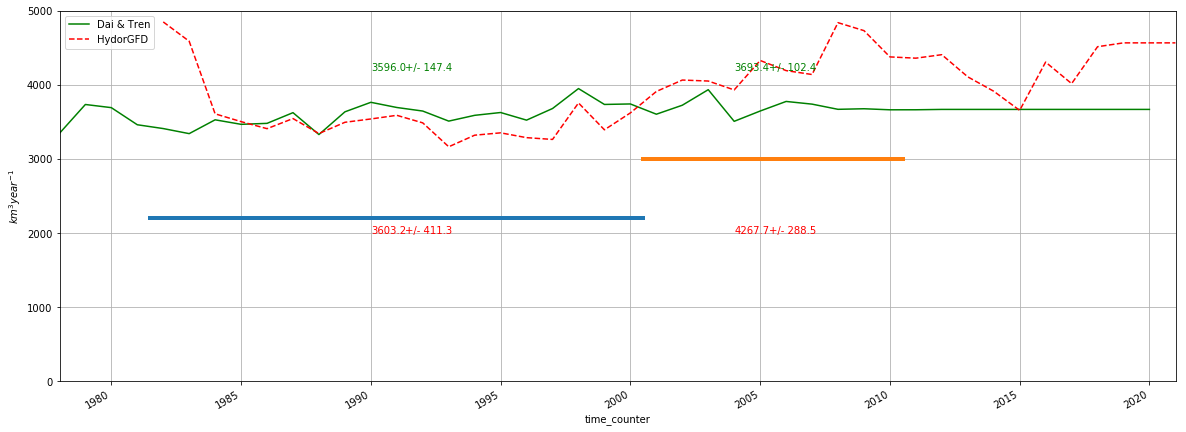

In [55]:
if False: 

    plt.figure(figsize=(20,15))
    ax=plt.subplot(211)
    plt.title('Yearly mean runoffs computed over the Arctic basin')
    (ds_DTBrnf_mon['sorunoff_sum'].resample(time_counter='1Y').mean()).plot(color='g',label='Dai & Tren')
    (ds_rnf_mon['sorunoff_sum'].resample(time_counter='1Y').mean()).plot(linestyle='dashed',color='r',label='HydorGFD')
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1978','2021'])
    plt.ylim([0., 5000.])
    plt.grid()

    plt.plot(pd.date_range(start=str(syear_S1),end=str(eyear_S1+1),freq="1Y")+pd.DateOffset(days=-183), np.ones(eyear_S1-syear_S1+1)*2200., linewidth=4, linestyle='solid')
    plt.plot(pd.date_range(start=str(syear_S2),end=str(eyear_S2+1),freq="1Y")+pd.DateOffset(days=-183), np.ones(eyear_S2-syear_S2+1)*3000., linewidth=4, linestyle='solid')


    ax.text('1990', 2000.,str(np.round(np.array(ds_rnf_year['sorunoff_Mean_S1']),decimals=1)), color='r')
    ax.text('1991.5', 2000.,'+/- '+str(np.round(np.array(ds_rnf_year['sorunoff_Std_S1']),decimals=1)), color='r')
    ax.text('2004', 2000.,str(np.round(np.array(ds_rnf_year['sorunoff_Mean_S2']),decimals=1)), color='r')
    ax.text('2005.5', 2000.,'+/- '+str(np.round(np.array(ds_rnf_year['sorunoff_Std_S2']),decimals=1)), color='r')

    ax.text('1990', 4200.,str(np.round(np.array(ds_DTBrnf_year['sorunoff_Mean_S1']),decimals=1)), color='g')
    ax.text('1991.5', 4200.,'+/- '+str(np.round(np.array(ds_DTBrnf_year['sorunoff_Std_S1']),decimals=1)), color='g')
    ax.text('2004', 4200.,str(np.round(np.array(ds_DTBrnf_year['sorunoff_Mean_S2']),decimals=1)), color='g')
    ax.text('2005.5', 4200.,'+/- '+str(np.round(np.array(ds_DTBrnf_year['sorunoff_Std_S2']),decimals=1)), color='g')

    plt.legend()
    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_Arctic_Yearly_y19802020.pdf')


># Define all area > 65°N

In [77]:
tmsk_ARC=xr.where(ds_dfg['gphit'] < 65., 0., tmask2D)

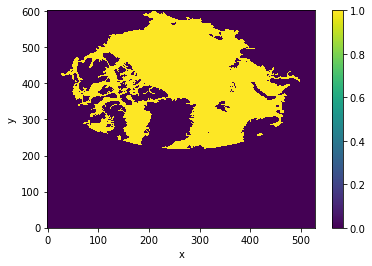

In [78]:
if True: 
    tmsk_ARC.plot()

> # ISBA for lat > 65°N

In [79]:
ds_rnf_mon['sorunoff_sum_Arc']=(('time_counter'),((ds_rnfhpe['runoff'][:,:,:]*tmsk_ARC[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

In [80]:
ds_rnf_year['sorunoff_sum_Arc']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Arc'].resample(time_counter="1Y").mean())

> # DTB for lat > 65°N

In [81]:
ds_DTBrnf_mon['sorunoff_sum_Arc']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmsk_ARC[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

In [82]:
ds_DTBrnf_year['sorunoff_sum_Arc']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum_Arc'].resample(time_counter="1Y").mean())

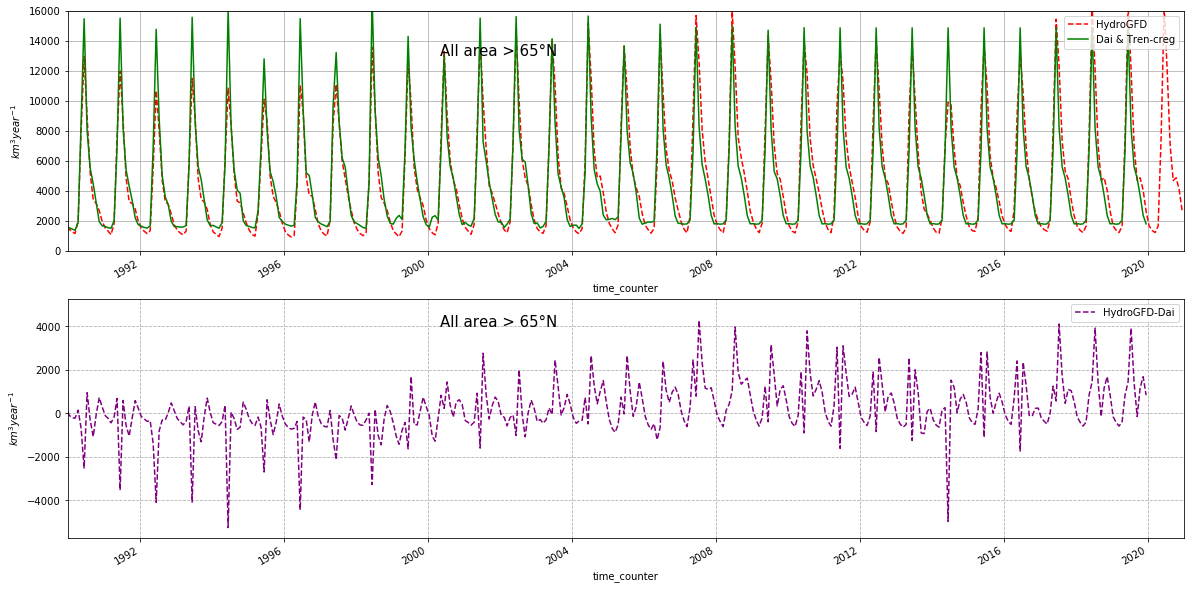

In [86]:
plt.figure(figsize=(20,15))

plt.subplot(311)
(ds_rnf_mon['sorunoff_sum_Arc']).plot(color='r',linestyle='dashed',label='HydroGFD')
(ds_DTBrnf_mon['sorunoff_sum_Arc']).plot(color='g',label='Dai & Tren-creg')
plt.text('2000.5',13000.,'All area > 65°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2021'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(312)
(ds_rnf_mon['sorunoff_sum_Arc']-ds_DTBrnf_mon['sorunoff_sum_Arc']).plot\
(color='purple',linestyle='dashed',label='HydroGFD-Dai')
plt.text('2000.5',4000.,'All area > 65°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2021'])
#plt.ylim([-6000., 6000.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=False
if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_ArcticG65DegN_Monthly_y19902021.pdf')

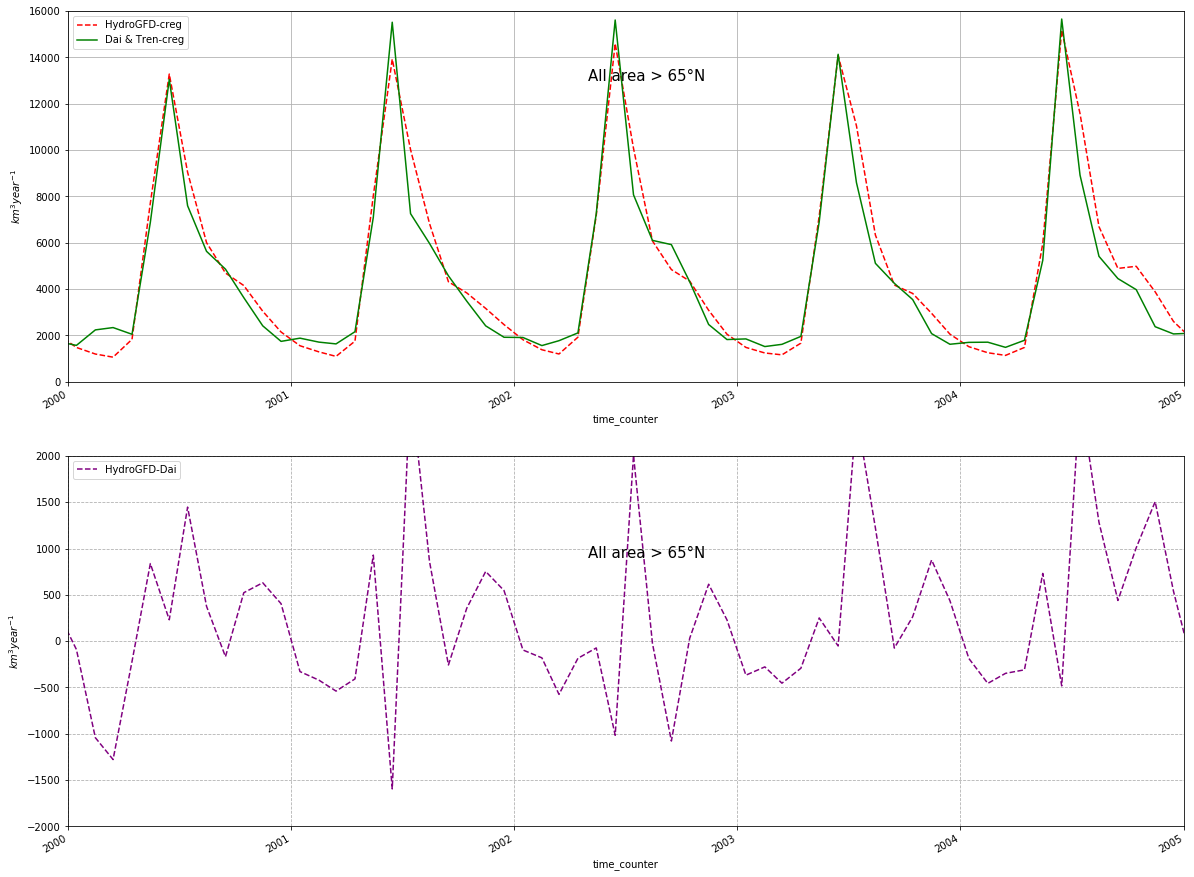

In [90]:
if False: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Arc']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
    (ds_DTBrnf_mon['sorunoff_sum_Arc']).plot(color='g',label='Dai & Tren-creg')
    plt.text('2002.5',13000.,'All area > 65°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    (ds_rnf_mon['sorunoff_sum_Arc']-ds_DTBrnf_mon['sorunoff_sum_Arc']).plot\
    (color='purple',linestyle='dashed',label='HydroGFD-Dai')
    plt.text('2002.5',900.,'All area > 65°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([-2000., 2000.])
    plt.grid(True,linestyle='dashed')
    plt.legend()

    savefig=True
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_ArcticG65DegN_Monthly_y20002005.pdf')

> # Define a box over the Eurasian basin only 

In [91]:
tmsk_ARC_EURA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_EURA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_EURA)
tmsk_ARC_EURA=xr.where((ds_dfg['glamt'] <  90.), 0., tmsk_ARC_EURA) 
tmsk_ARC_EURA=xr.where((ds_dfg['glamt'] > 180.), 0., tmsk_ARC_EURA) 

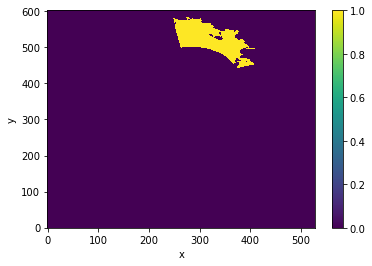

In [56]:
if False: 
    tmsk_ARC_EURA.plot()

# > HYDROGFD data over the Eurasian box

In [92]:
ds_rnf_mon['sorunoff_sum_Eura']=(('time_counter'),((ds_rnfhpe['runoff'][:,:,:]*tmsk_ARC_EURA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

In [93]:
ds_rnf_year['sorunoff_sum_Eura']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Eura'].resample(time_counter="1Y").mean())

# > Dai data over the Eurasian box

In [94]:
ds_DTBrnf_mon['sorunoff_sum_Eura']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmsk_ARC_EURA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

In [95]:
ds_DTBrnf_year['sorunoff_sum_Eura']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum_Eura'].resample(time_counter="1Y").mean())

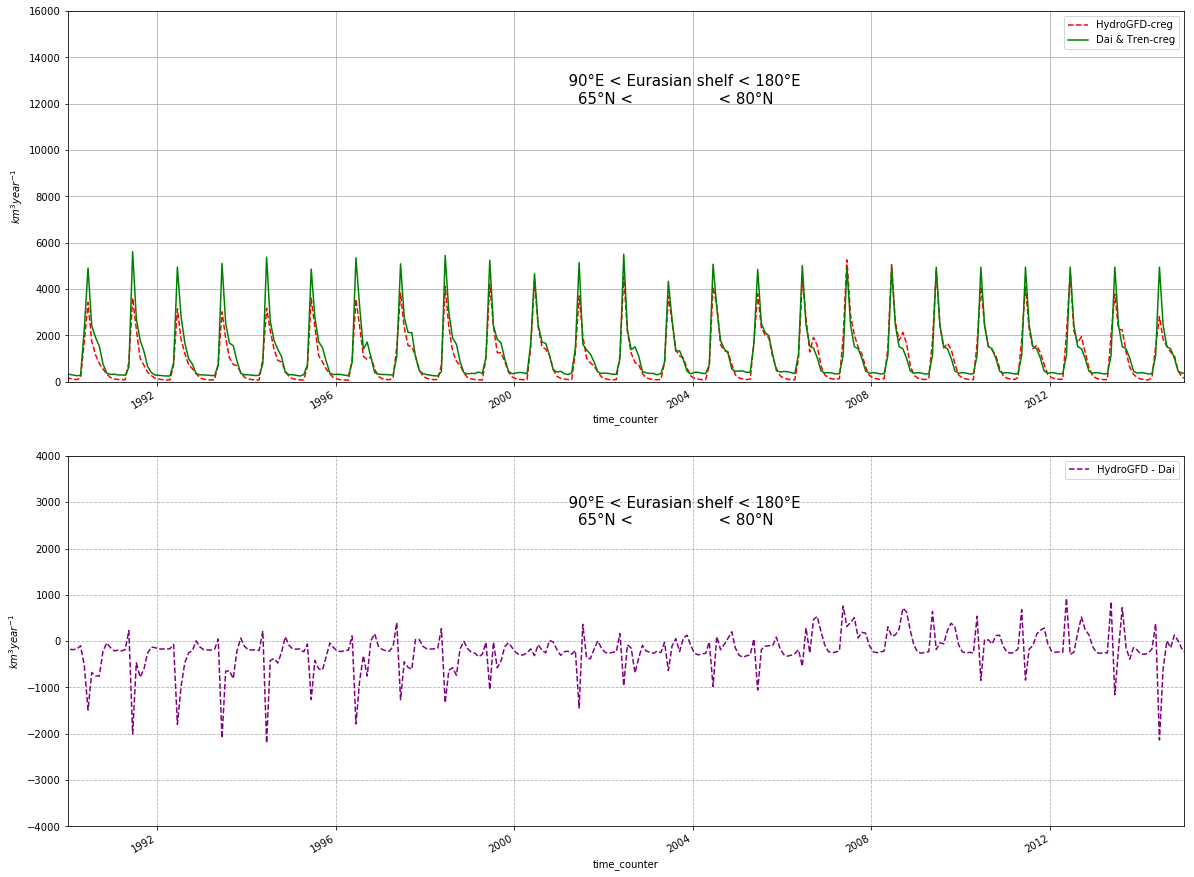

In [97]:
if True: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Eura']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
    (ds_DTBrnf_mon['sorunoff_sum_Eura']).plot(color='g',label='Dai & Tren-creg')
    plt.text('2001.',12000.,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    (ds_rnf_mon['sorunoff_sum_Eura']-ds_DTBrnf_mon['sorunoff_sum_Eura']).plot\
    (color='purple',linestyle='dashed',label='HydroGFD - Dai')
    plt.text('2001.',2500.,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([-4000., 4000.])
    plt.grid(True,linestyle='dashed')
    plt.legend()

    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_Eura65N-80N-90E-180E_Monthly_y19902015.pdf')

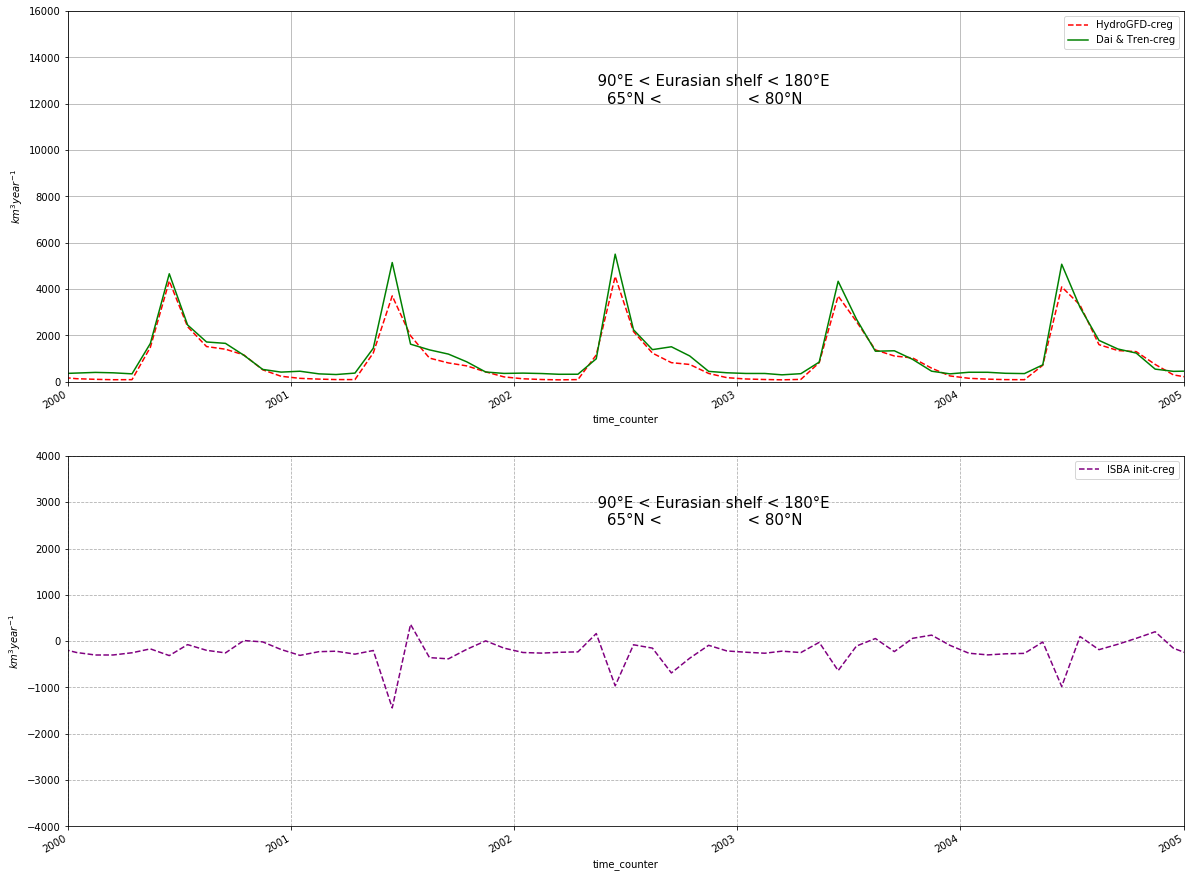

In [98]:
if True: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Eura']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
    (ds_DTBrnf_mon['sorunoff_sum_Eura']).plot(color='g',label='Dai & Tren-creg')
    plt.text('2002.5',12000.,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()


    plt.subplot(212)
    (ds_rnf_mon['sorunoff_sum_Eura']-ds_DTBrnf_mon['sorunoff_sum_Eura']).plot\
    (color='purple',linestyle='dashed',label='ISBA init-creg')
    plt.text('2002.5',2500.,'  90°E < Eurasian shelf < 180°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([-4000., 4000.])
    plt.grid(True,linestyle='dashed')
    plt.legend()


    savefig=True
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_Eura65N-80N-90E-180E_Monthly_y20002005.pdf')

> # Define a box over the Barents & Kara areas 

In [99]:
tmsk_ARC_BAKA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_BAKA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_BAKA)
tmsk_ARC_BAKA=xr.where((ds_dfg['glamt'] <   0.), 0., tmsk_ARC_BAKA) 
tmsk_ARC_BAKA=xr.where((ds_dfg['glamt'] >  90.), 0., tmsk_ARC_BAKA) 

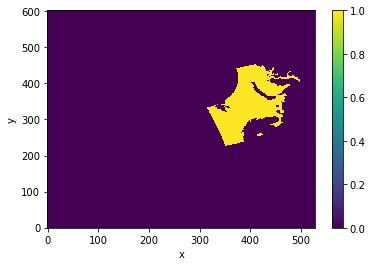

In [64]:
if True: 
    tmsk_ARC_BAKA.plot()

# > ISBA data over the Barents & Kara areas

In [102]:
ds_rnf_mon['sorunoff_sum_Baka']=(('time_counter'),((ds_rnfhpe['runoff'][:,:,:]*tmsk_ARC_BAKA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_rnf_year['sorunoff_sum_Baka']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Baka'].resample(time_counter="1Y").mean())

# > Dai data over the Barents & Kara areas

In [103]:
ds_DTBrnf_mon['sorunoff_sum_Baka']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmsk_ARC_BAKA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_DTBrnf_year['sorunoff_sum_Baka']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum_Baka'].resample(time_counter="1Y").mean())

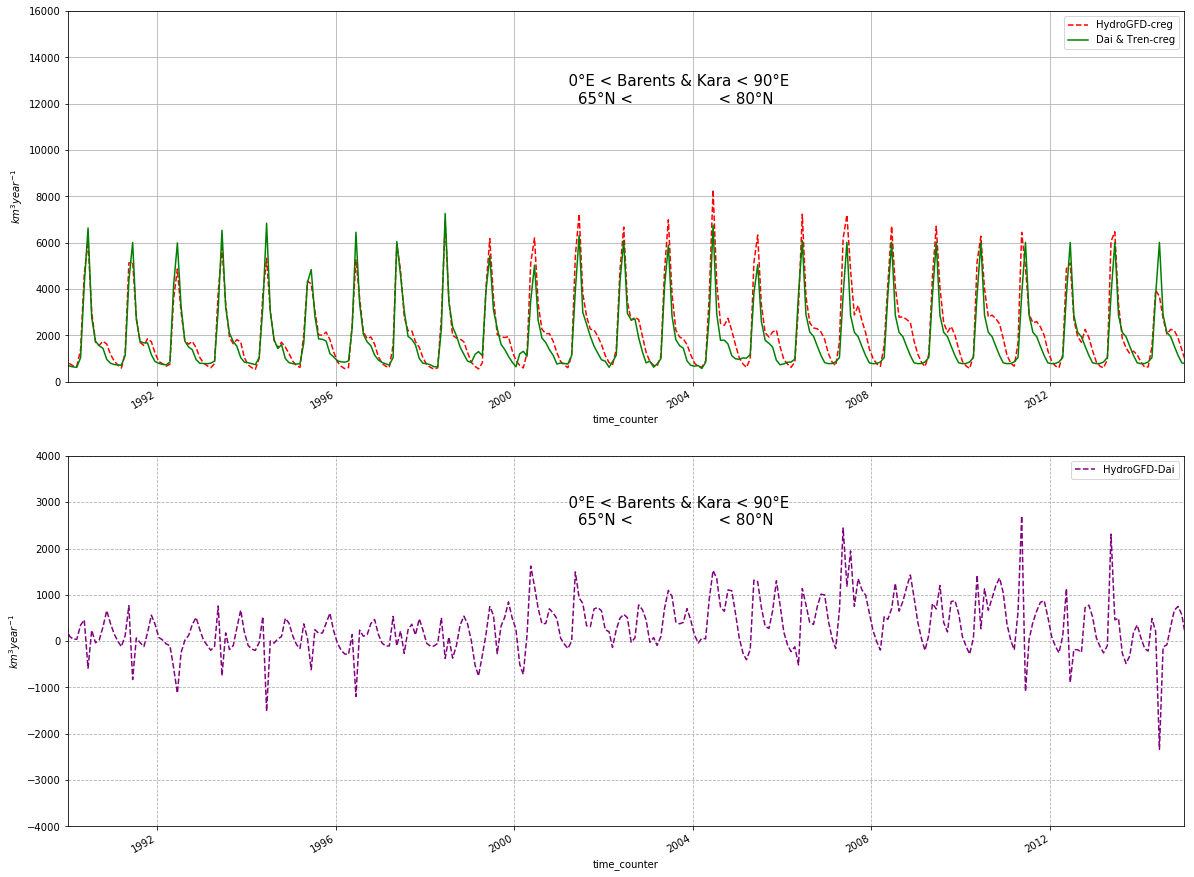

In [104]:
if True: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Baka']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
    (ds_DTBrnf_mon['sorunoff_sum_Baka']).plot(color='g',label='Dai & Tren-creg')
    plt.text('2001.',12000.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    (ds_rnf_mon['sorunoff_sum_Baka']-ds_DTBrnf_mon['sorunoff_sum_Baka']).plot\
    (color='purple',linestyle='dashed',label='HydroGFD-Dai')
    plt.text('2001.',2500.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['1990','2015'])
    plt.ylim([-4000., 4000.])
    plt.grid(True,linestyle='dashed')
    plt.legend()

    savefig=True
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_BarentsKara65N-80N-0E-90E_Monthly_y19902015.pdf')

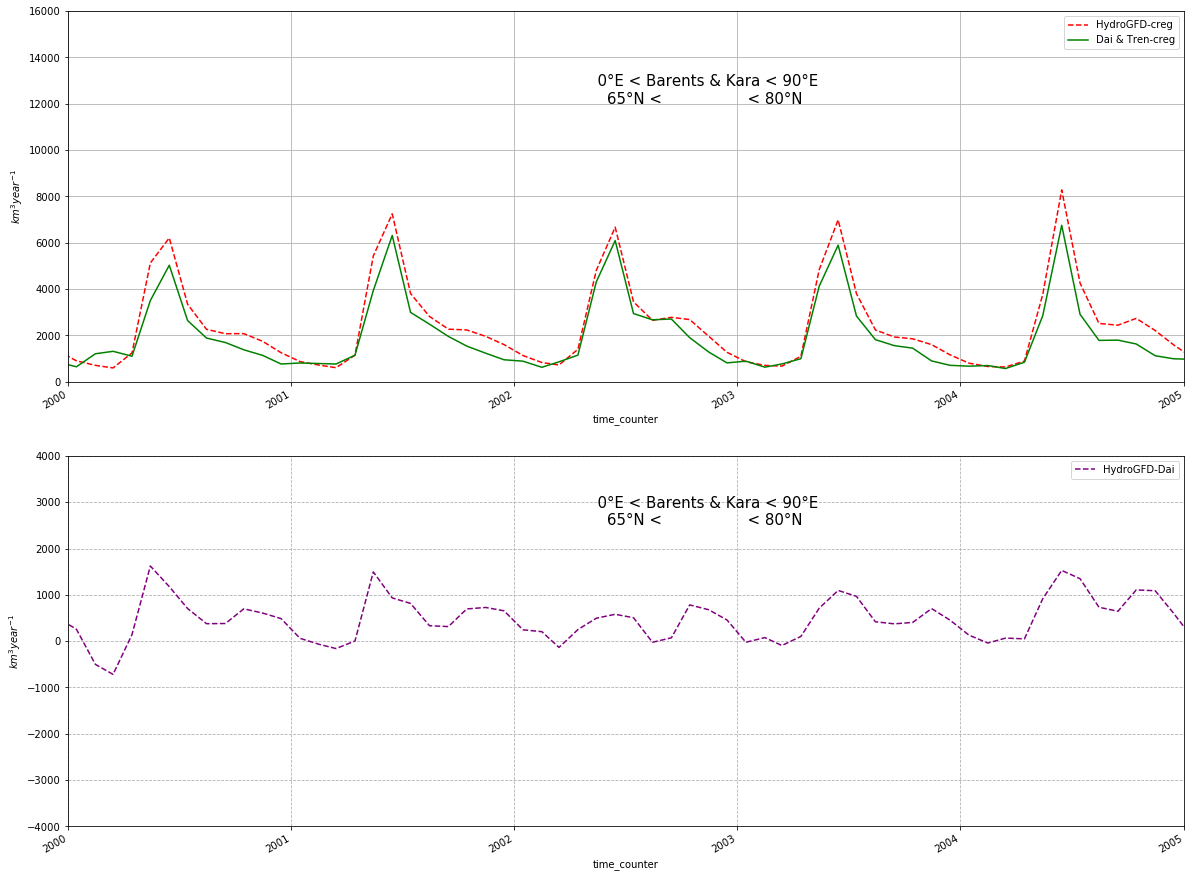

In [105]:
if False: 
    plt.figure(figsize=(20,15))

    plt.subplot(211)
    (ds_rnf_mon['sorunoff_sum_Baka']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
    (ds_DTBrnf_mon['sorunoff_sum_Baka']).plot(color='g',label='Dai & Tren-creg')
    plt.text('2002.5',12000.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([0., 16000.])
    plt.grid(True)
    plt.legend()


    plt.subplot(212)
    (ds_rnf_mon['sorunoff_sum_Baka']-ds_DTBrnf_mon['sorunoff_sum_Baka']).plot\
    (color='purple',linestyle='dashed',label='HydroGFD-Dai')
    plt.text('2002.5',2500.,'  0°E < Barents & Kara < 90°E \n    65°N <                  < 80°N', size=15)
    plt.ylabel('$km{^3} year^{-1}$')
    plt.xlim(['2000','2005'])
    plt.ylim([-4000., 4000.])
    plt.grid(True,linestyle='dashed')
    plt.legend()


    savefig=False
    if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_BarentsKara65N-80N-0E-90E_Monthly_y20002005.pdf')

> # Define a box over the Greenland & CAA areas 

In [106]:
tmsk_ARC_GRCA=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_GRCA=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_GRCA)
tmsk_ARC_GRCA=xr.where((ds_dfg['glamt'] < -120.), 0., tmsk_ARC_GRCA) 
tmsk_ARC_GRCA=xr.where((ds_dfg['glamt'] >    0.), 0., tmsk_ARC_GRCA) 

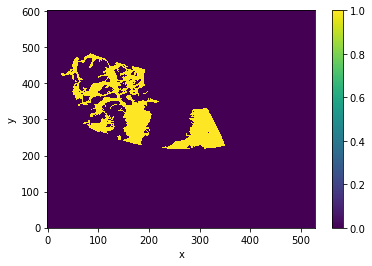

In [51]:
tmsk_ARC_GRCA.plot()

# > ISBA data over the Greenland & CAA areas

In [108]:
ds_rnf_mon['sorunoff_sum_Grca']=(('time_counter'),((ds_rnfhpe['runoff'][:,:,:]*tmsk_ARC_GRCA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_rnf_year['sorunoff_sum_Grca']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Grca'].resample(time_counter="1Y").mean())

# > Dai data over the Greenland & CAA areas

In [109]:
ds_DTBrnf_mon['sorunoff_sum_Grca']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmsk_ARC_GRCA[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_DTBrnf_year['sorunoff_sum_Grca']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum_Grca'].resample(time_counter="1Y").mean())

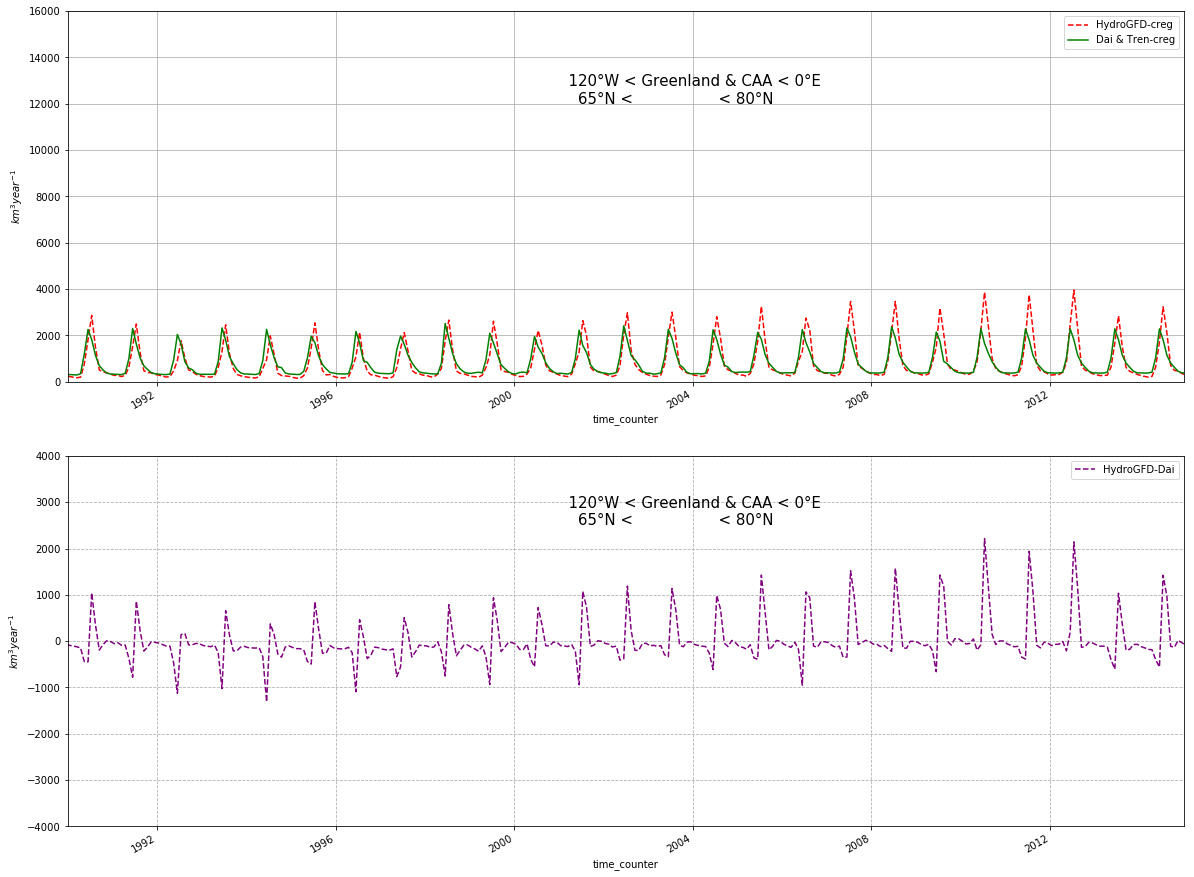

In [111]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Grca']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
(ds_DTBrnf_mon['sorunoff_sum_Grca']).plot(color='g',label='Dai & Tren-creg')
plt.text('2001.',12000.,'  120°W < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(212)
(ds_rnf_mon['sorunoff_sum_Grca']-ds_DTBrnf_mon['sorunoff_sum_Grca']).plot\
(color='purple',linestyle='dashed',label='HydroGFD-Dai')
plt.text('2001.',2500.,'  120°W < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([-4000., 4000.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=True
if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_GreenlandCAA65N-80N-0E-120W_Monthly_y19902015.pdf')

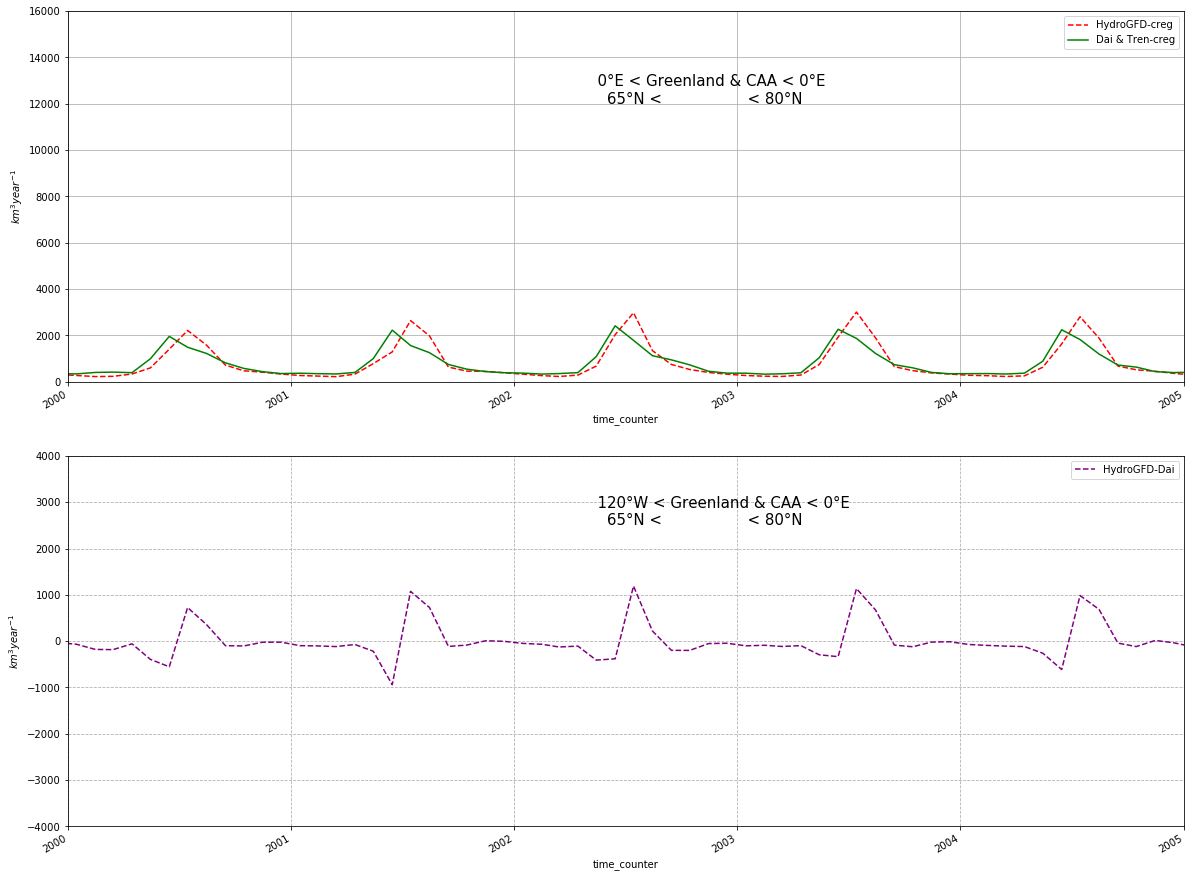

In [112]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Grca']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
(ds_DTBrnf_mon['sorunoff_sum_Grca']).plot(color='g',label='Dai & Tren-creg')
plt.text('2002.5',12000.,'  0°E < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['2000','2005'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()


plt.subplot(212)
(ds_rnf_mon['sorunoff_sum_Grca']-ds_DTBrnf_mon['sorunoff_sum_Grca']).plot\
(color='purple',linestyle='dashed',label='HydroGFD-Dai')
plt.text('2002.5',2500.,'  120°W < Greenland & CAA < 0°E \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['2000','2005'])
plt.ylim([-4000., 4000.])
plt.grid(True,linestyle='dashed')
plt.legend()


savefig=True
if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_GreenlandCAA65N-80N-0E-120W_Monthly_y20002005.pdf')

> # Define a box over the Alaska & Bering areas 

In [113]:
tmsk_ARC_ALBE=xr.where((ds_dfg['gphit'] <  65.), 0., tmask2D)
tmsk_ARC_ALBE=xr.where((ds_dfg['gphit'] >  80.), 0., tmsk_ARC_ALBE)
tmsk_ARC_ALBE=xr.where((ds_dfg['glamt'] < -180.), 0., tmsk_ARC_ALBE) 
tmsk_ARC_ALBE=xr.where((ds_dfg['glamt'] > -120.), 0., tmsk_ARC_ALBE) 

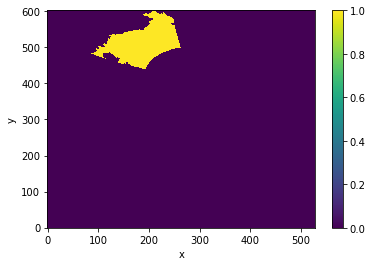

In [114]:
tmsk_ARC_ALBE.plot()

# > ISBA data over the Alaska & Bering areas

In [115]:
ds_rnf_mon['sorunoff_sum_Albe']=(('time_counter'),((ds_rnfhpe['runoff'][:,:,:]*tmsk_ARC_ALBE[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_rnf_year['sorunoff_sum_Albe']=(('time_counter'),ds_rnf_mon['sorunoff_sum_Albe'].resample(time_counter="1Y").mean())

# > Dai data over the Alaska & Bering areas

In [116]:
ds_DTBrnf_mon['sorunoff_sum_Albe']=(('time_counter'),((ds_DTBrnf['runoff'][:,:,:]*tmsk_ARC_ALBE[0,:,:]*\
                                                ds_dfg['e1t'].isel(t=0)*\
                                                ds_dfg['e2t'].isel(t=0))*alpha).sum(dim=['x','y']))

ds_DTBrnf_year['sorunoff_sum_Albe']=(('time_counter'),ds_DTBrnf_mon['sorunoff_sum_Albe'].resample(time_counter="1Y").mean())

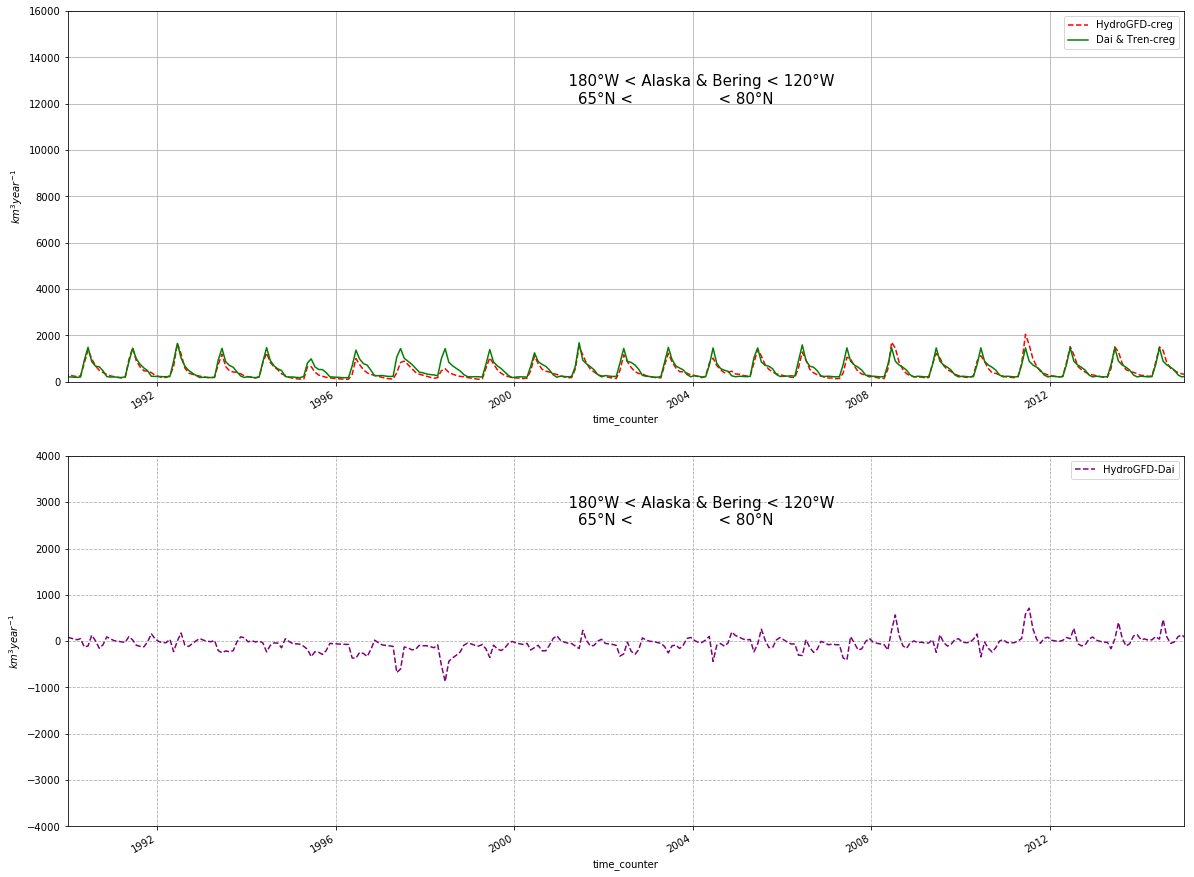

In [117]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Albe']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
(ds_DTBrnf_mon['sorunoff_sum_Albe']).plot(color='g',label='Dai & Tren-creg')
plt.text('2001.',12000.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()

plt.subplot(212)
(ds_rnf_mon['sorunoff_sum_Albe']-ds_DTBrnf_mon['sorunoff_sum_Albe']).plot\
(color='purple',linestyle='dashed',label='HydroGFD-Dai')
plt.text('2001.',2500.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['1990','2015'])
plt.ylim([-4000., 4000.])
plt.grid(True,linestyle='dashed')
plt.legend()

savefig=False
if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_AlskaBering65N-80N-120W-180W_Monthly_y19902015.pdf')

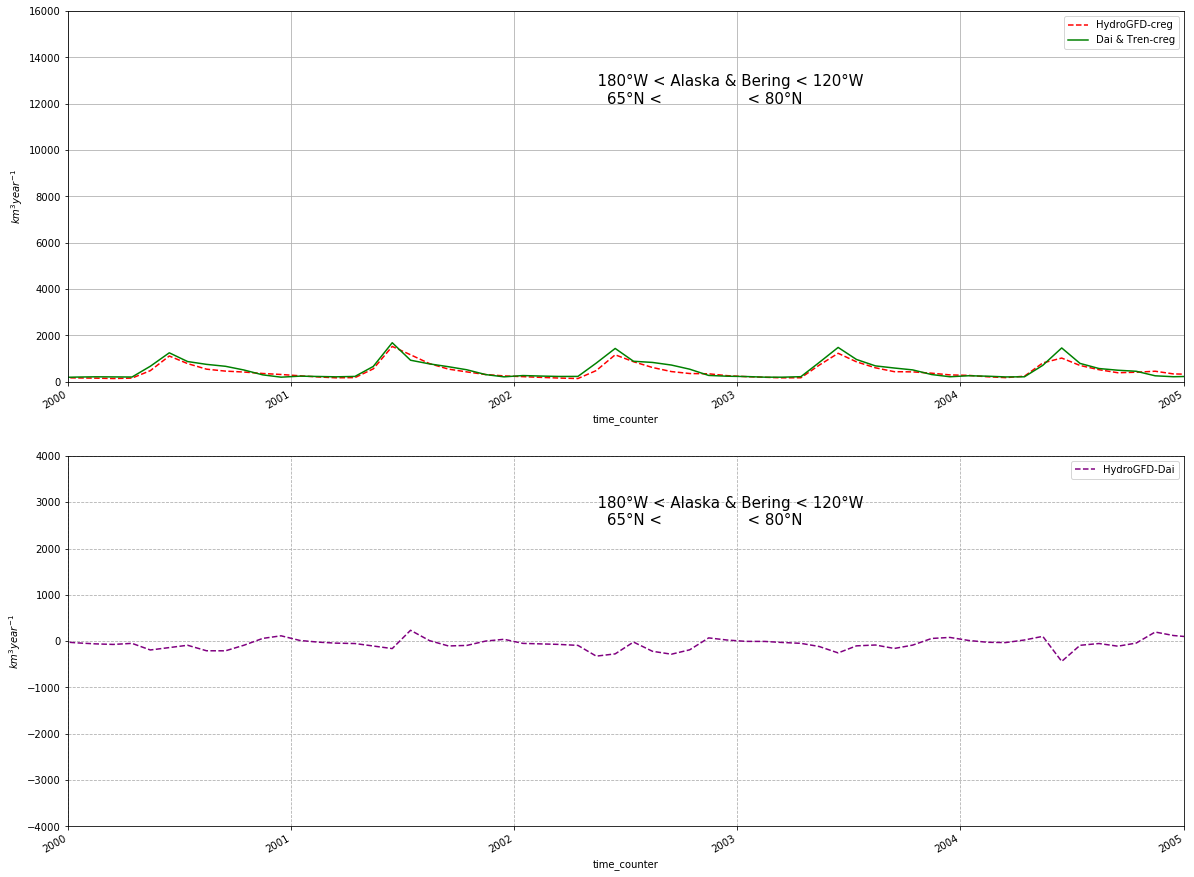

In [119]:
plt.figure(figsize=(20,15))

plt.subplot(211)
(ds_rnf_mon['sorunoff_sum_Albe']).plot(color='r',linestyle='dashed',label='HydroGFD-creg')
(ds_DTBrnf_mon['sorunoff_sum_Albe']).plot(color='g',label='Dai & Tren-creg')
plt.text('2002.5',12000.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['2000','2005'])
plt.ylim([0., 16000.])
plt.grid(True)
plt.legend()


plt.subplot(212)
(ds_rnf_mon['sorunoff_sum_Albe']-ds_DTBrnf_mon['sorunoff_sum_Albe']).plot\
(color='purple',linestyle='dashed',label='HydroGFD-Dai')
plt.text('2002.5',2500.,'  180°W < Alaska & Bering < 120°W \n    65°N <                  < 80°N', size=15)
plt.ylabel('$km{^3} year^{-1}$')
plt.xlim(['2000','2005'])
plt.ylim([-4000., 4000.])
plt.grid(True,linestyle='dashed')
plt.legend()


savefig=True
if savefig: plt.savefig('./FIGURES/Runoff_DAI_vs_HYDROGFD_AlskaBering65N-80N-120W-180W_Monthly_y20002005.pdf')